The goal of this notebook is training an anomaly detection model.

### 0. Preparations

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import joblib

from sklearn.ensemble import IsolationForest

Read the training and testing data

In [2]:
train_raw = pd.read_csv("/src/data/train.csv")
test_raw = pd.read_csv("/src/data/test.csv")

### 1. Train

First, create an instance of the `IsolationForest`.

In [3]:
model = IsolationForest(random_state=16)

Now, fit the model:

In [4]:
model.fit(train_raw)

IsolationForest(random_state=16)

### 2. Visualize the dedcision boudaries

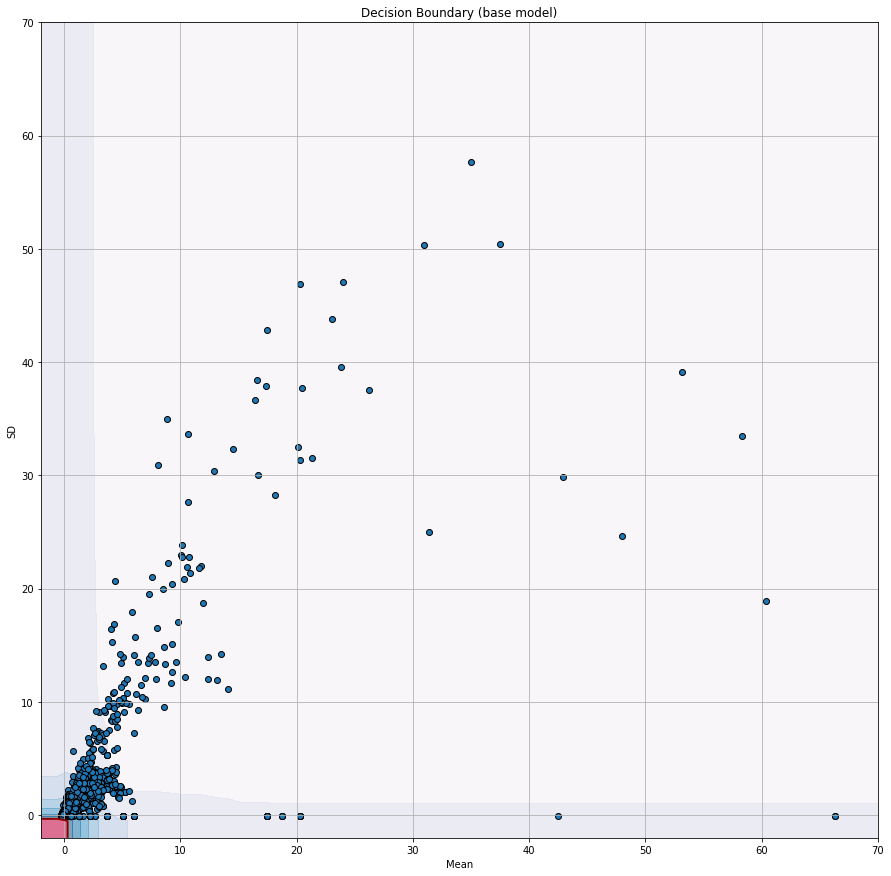

In [5]:
# Change the plot's size.
plt.rcParams['figure.figsize'] = [15, 15]

# Plot of the decision frontier
xx, yy = np.meshgrid(np.linspace(-2, 70, 100), np.linspace(-2, 70, 100))
Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.title("Decision Boundary (base model)")
# This draw the "soft" or secondary boundaries.
plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), 0, 8), cmap=plt.cm.PuBu, alpha=0.5)
# This draw the line that separates the hard from the soft boundaries.
plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='darkred')
# This draw the hard boundary
plt.contourf(xx, yy, Z, levels=[0, Z.max()], colors='palevioletred')
plt.scatter(train_raw.iloc[:, 0],
            train_raw.iloc[:, 1],
            edgecolors='k')
plt.xlabel('Mean')
plt.ylabel('SD')
plt.grid(True)
plt.show()


### 3. Retrain the model

About 15% has been marked as outliers - and this is a lot.  
To detect more "outlied" outliers, retrain the model but this time tell it to mark only 0.1% as outliers.

In [6]:
model_adjusted = IsolationForest(random_state=16, contamination=0.001)

In [7]:
model_adjusted.fit(train_raw)

IsolationForest(contamination=0.001, random_state=16)

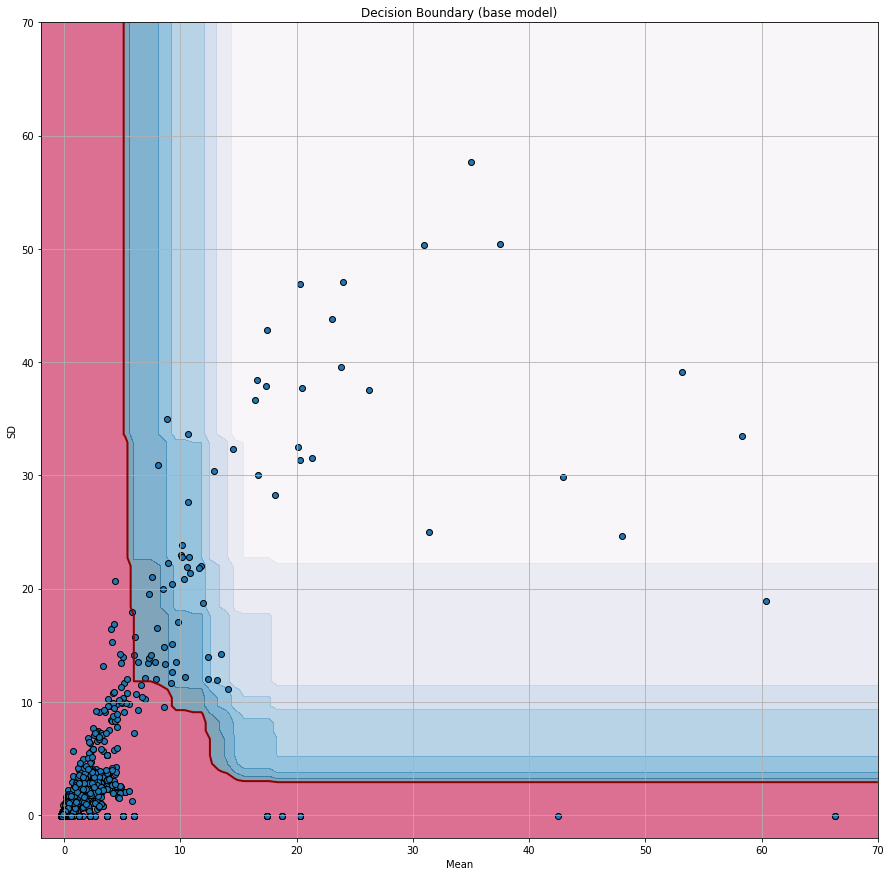

In [8]:
# Change the plot's size.
plt.rcParams['figure.figsize'] = [15, 15]

# Plot of the decision frontier
xx, yy = np.meshgrid(np.linspace(-2, 70, 100), np.linspace(-2, 70, 100))
Z = model_adjusted.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.title("Decision Boundary (base model)")
# This draw the "soft" or secondary boundaries.
plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), 0, 8), cmap=plt.cm.PuBu, alpha=0.5)
# This draw the line that separates the hard from the soft boundaries.
plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='darkred')
# This draw the hard boundary
plt.contourf(xx, yy, Z, levels=[0, Z.max()], colors='palevioletred')
plt.scatter(train_raw.iloc[:, 0],
            train_raw.iloc[:, 1],
            edgecolors='k')
plt.xlabel('Mean')
plt.ylabel('SD')
plt.grid(True)
plt.show()

### 4. Predict

Now it's a time to make a predictions on test data:

In [9]:
predictions = model_adjusted.predict(test_raw)

Let's visualize it:

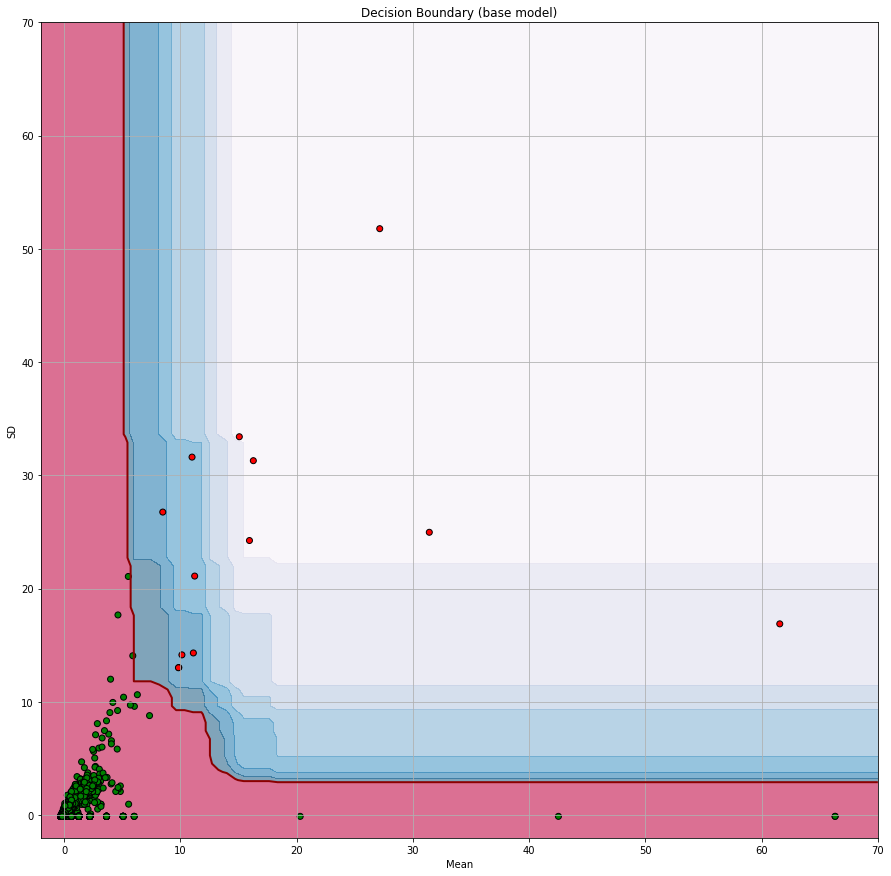

In [10]:
# Change the plot's size.
plt.rcParams['figure.figsize'] = [15, 15]

# Plot of the decision frontier
xx, yy = np.meshgrid(np.linspace(-2, 70, 100), np.linspace(-2, 70, 100))
Z = model_adjusted.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.title("Decision Boundary (base model)")
# This draw the "soft" or secondary boundaries.
plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), 0, 8), cmap=plt.cm.PuBu, alpha=0.5)
# This draw the line that separates the hard from the soft boundaries.
plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='darkred')
# This draw the hard boundary
plt.contourf(xx, yy, Z, levels=[0, Z.max()], colors='palevioletred')
plt.scatter(test_raw.iloc[:, 0],
            test_raw.iloc[:, 1],
            c=['green' if p == 1 else 'red' for p in predictions],
            edgecolors='k')
plt.xlabel('Mean')
plt.ylabel('SD')
plt.grid(True)
plt.show()

### 5. Export the model

In [11]:
joblib.dump(model_adjusted, "/src/model/model.joblib")

['/src/model/model.joblib']